### Author

**Name:** Simar Malhan  
**Place:** Toronto, ON, Canada  
**Email:** malhan.simar24@gmail.com  
[LinkedIn](https://www.linkedin.com/in/simarmalhan)

### Project: User Behavior Analysis: Predicting Ad Clicks with AI

In this project I will work on an artificial advertising dataset, indicating whether or not a particular internet user clicked on an advertisement. I will create a model that will predict whether or not they will click on an ad based off the features of that user.

This dataset contains the following features:

- 'Daily Time Spent on Site': consumer time on site in minutes
- 'Age': cutomer age in years
- 'Area Income': Avg. Income of geographical area of consumer
- 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
- 'Ad Topic Line': Headline of the advertisement
- 'City': City of consumer
- 'Male': Whether or not consumer was male
- 'Country': Country of consumer
- 'Timestamp': Time at which consumer clicked on Ad or closed window
- 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
ad_data = pd.read_csv('/Users/simarmalhan/Downloads/advertising.csv')

In [8]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [36]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Exploratory Data Analysis

In [9]:
# Histogram of the Age

<Axes: xlabel='Age', ylabel='Count'>

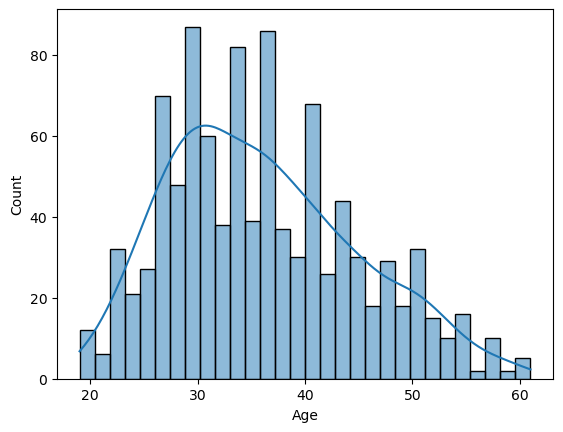

In [13]:
sns.histplot(x = 'Age', data = ad_data, bins = 30, kde = True)

### Jointplot of Age and Area Income

/Users/simarmalhan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


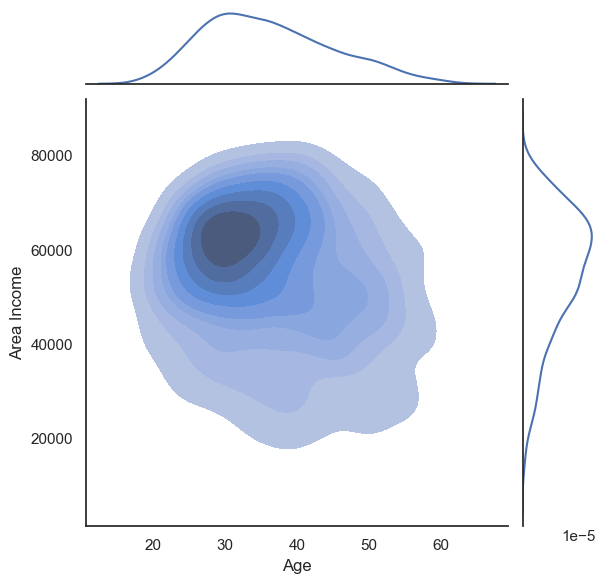

In [37]:
sns.set(style = "white", color_codes = True)  # Optional: Setting the style and color codes
sns.jointplot(x = 'Age', y = 'Area Income', data = ad_data, kind = 'kde', shade = True)

In [22]:
sns.set(style = 'white', color_codes = True)

### Joint Plot of Daily Time Spent on Site vs Daily Internet Usage

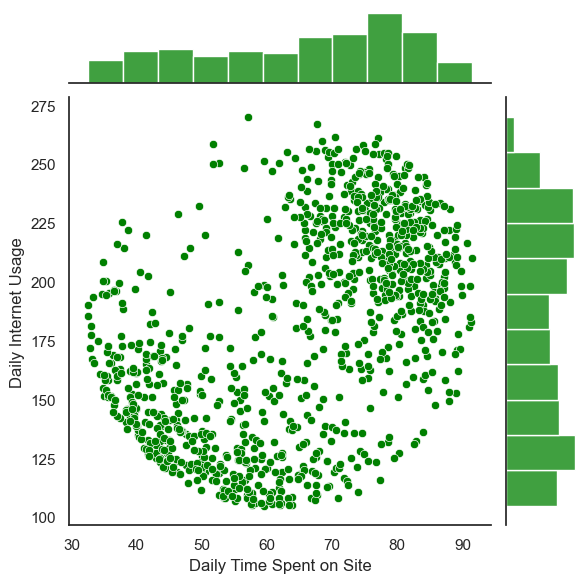

In [40]:
sns.jointplot(x = 'Daily Time Spent on Site',
              y = 'Daily Internet Usage',
              data = ad_data, color = 'green'
             #,kind = 'kde'
             )

### Pair Plot

/Users/simarmalhan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


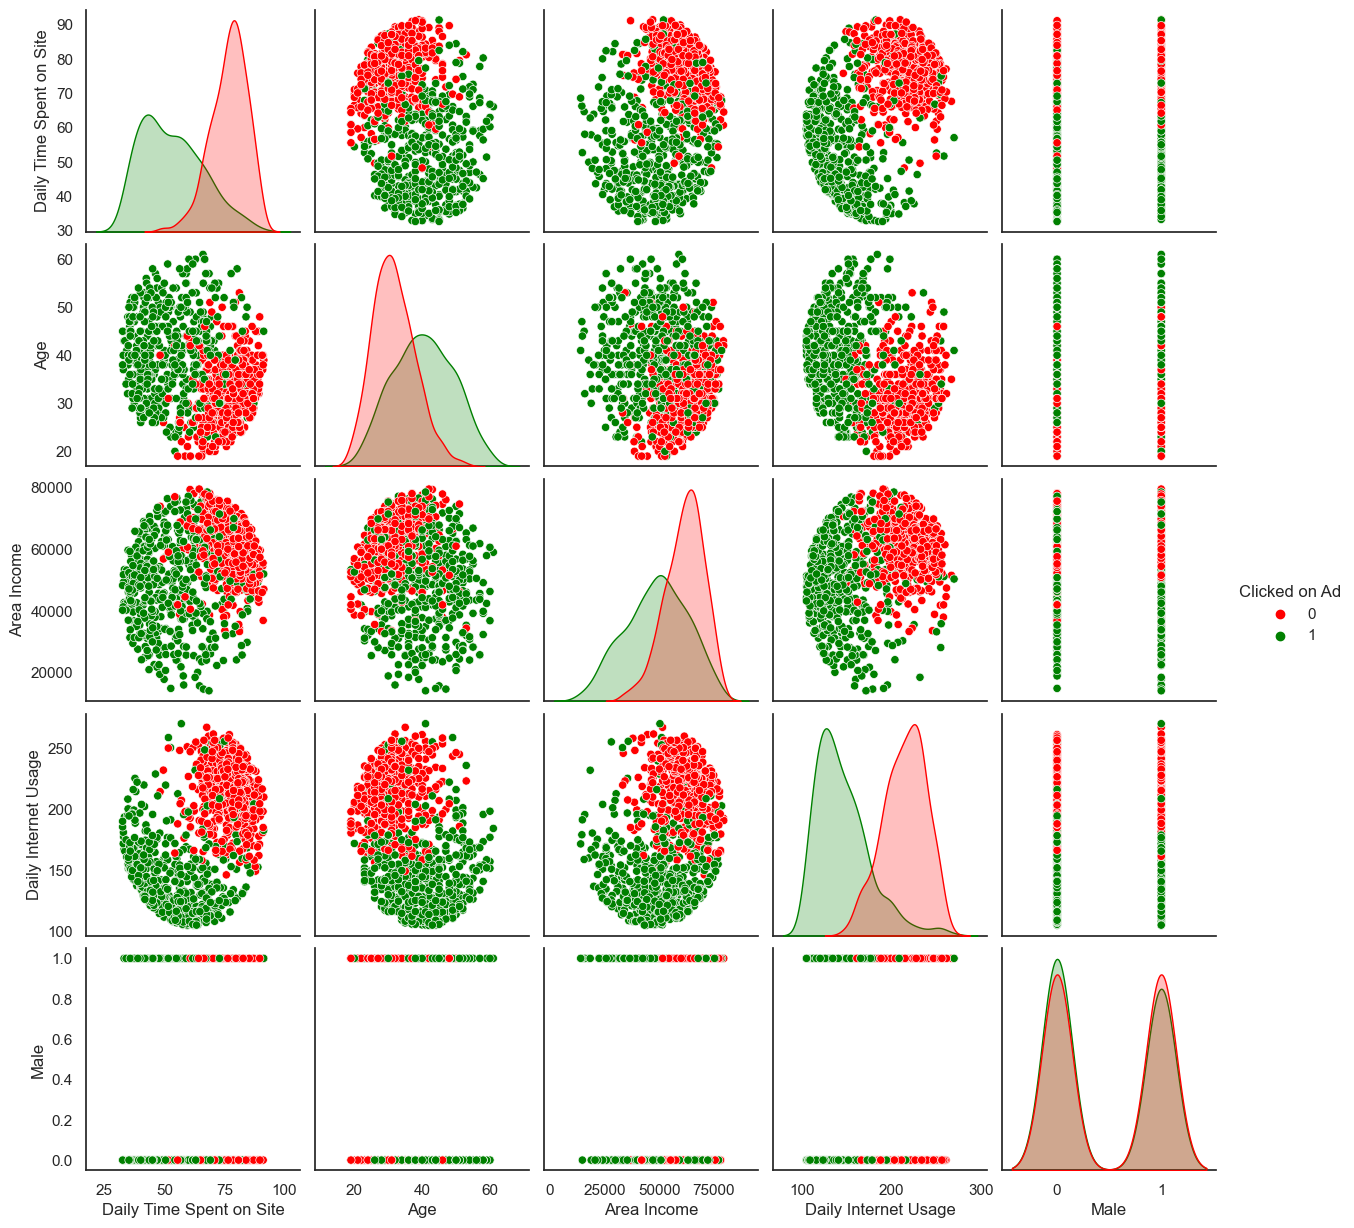

In [30]:
palette = {0: "red", 1: "green"}
sns.pairplot(ad_data, hue='Clicked on Ad', palette=palette)

### Logistic Regression

In [42]:
from sklearn.model_selection import train_test_split

lm = LogisticRegression()

In [44]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lm.fit(X_train, y_train)

LogisticRegression()

In [47]:
predictions = lm.predict(X_test)

### Create a classification report for the model

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[149   8]
 [ 14 129]]
